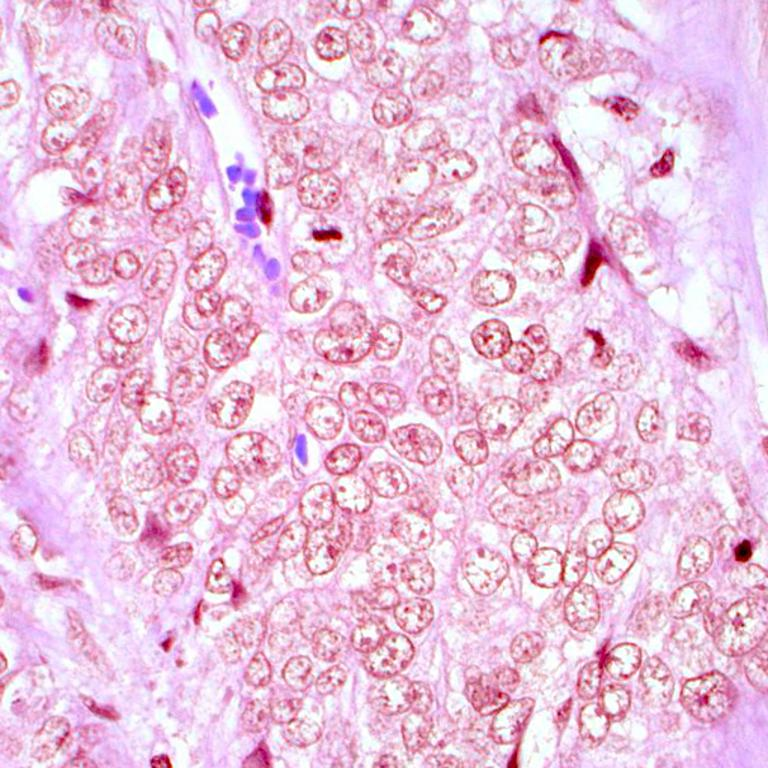

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/drive/MyDrive/Colon and lung cancer (histopathological)/colonca1.jpeg")
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(hsv_image)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Reading the original image
image_spot = cv2.imread("/content/drive/MyDrive/Colon and lung cancer (histopathological)/colonca1.jpeg")
cv2_imshow(image_spot)

# Converting it to HSV color space
hsv_image_spot = cv2.cvtColor(image_spot, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv_image_spot)

# Setting the black pixel mask and perform bitwise_and to get only the black pixels
mask = cv2.inRange(hsv_image_spot, (0, 0, 0), (180, 255, 40))
masked = cv2.bitwise_and(hsv_image_spot, hsv_image_spot, mask=mask)
cv2_imshow(masked)

Output hidden; open in https://colab.research.google.com to view.

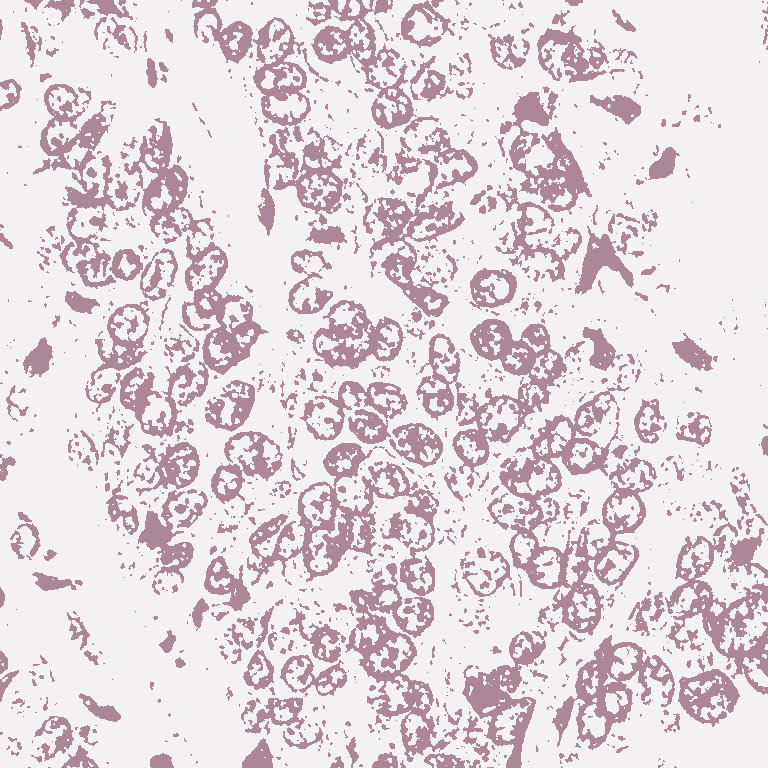

In [ ]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image_spot = cv2.imread("/content/download.png")
image_spot_reshaped = image_spot.reshape((image_spot.shape[0] * image_spot.shape[1], 3))

# convert to np.float32
Z = np.float32(image_spot_reshaped)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2

ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_spot.shape))

cv2_imshow(res2)

Color based


In [15]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("/content/drive/MyDrive/Colon and lung cancer (histopathological)/colonca1.jpeg")

# Convert the image from BGR to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split the channels
h, s, v = cv2.split(hsv)

# Compute the mean and standard deviation of the hue channel
mean_hue = np.mean(h)
std_hue = np.std(h)

# Compute the mean and standard deviation of the saturation channel
mean_sat = np.mean(s)
std_sat = np.std(s)

# Compute the mean and standard deviation of the value channel
mean_val = np.mean(v)
std_val = np.std(v)

# The extracted features are the mean and standard deviation of each color channel
features = [mean_hue, std_hue, mean_sat, std_sat, mean_val, std_val]

# Display the extracted features
print("Mean hue: ", mean_hue)
print("Standard deviation of hue: ", std_hue)
print("Mean saturation: ", mean_sat)
print("Standard deviation of saturation: ", std_sat)
print("Mean value: ", mean_val)
print("Standard deviation of value: ", std_val)


Mean hue:  135.42731730143228
Standard deviation of hue:  31.34809852504486
Mean saturation:  48.80130513509115
Standard deviation of saturation:  33.01442475055233
Mean value:  236.5582750108507
Standard deviation of value:  19.182849674058108


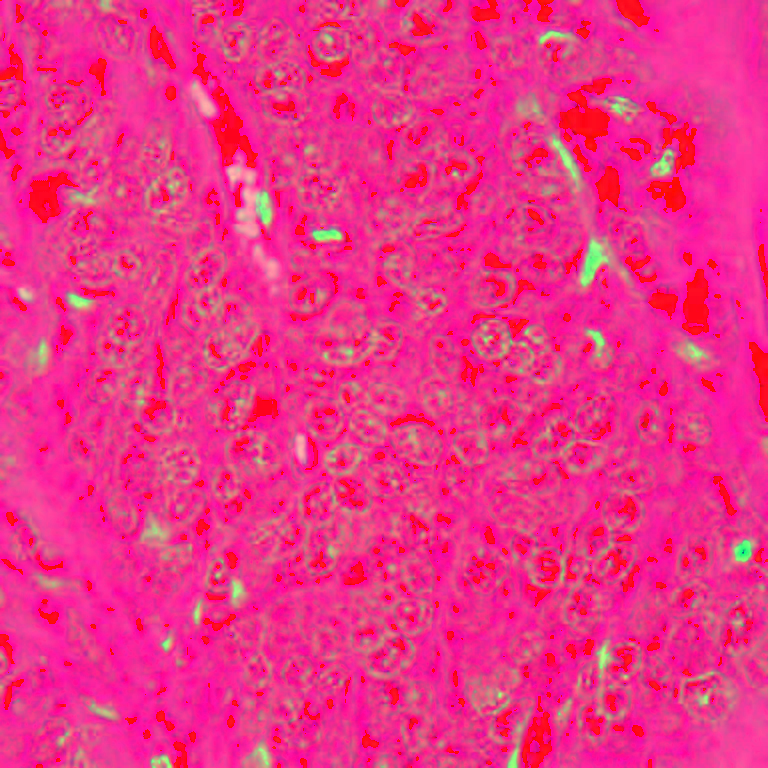

In [17]:
from google.colab.patches import cv2_imshow
cv2_imshow(hsv)

Shape based


In [14]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("/content/drive/MyDrive/Colon and lung cancer (histopathological)/colonca1.jpeg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to obtain a binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find the contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop over the contours
for c in contours:
    # Compute the area of the contour
    area = cv2.contourArea(c)
    
    # Compute the perimeter of the contour
    perimeter = cv2.arcLength(c, True)
    
    # Compute the compactness of the contour
    compactness = (perimeter*2) / area
    
    # Compute the aspect ratio of the bounding rectangle
    x, y, w, h = cv2.boundingRect(c)
    aspect_ratio = w / h
    
    # The extracted features are the area, perimeter, compactness, and aspect ratio
    features = [area, perimeter, compactness, aspect_ratio]

ZeroDivisionError: ignored

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread("/content/download.png",0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
